<a href="https://colab.research.google.com/github/Samuel-Njoroge/Image_to_Pencil_Sketch_with_Python/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS  FLOWERS  CLASSIFICATION.**

The Iris Flower dataset contains 3 classes.
1. Versicolor
2. Setosa
3. Virginica

The columns contains the flower's features that distinguishes the three.
1. Sepal length
2. Sepal width
3. Petal length
4. Petal width
5. Class

In [1]:
#Mounting the drive.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Importing libraries.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [4]:
#Loading the dataset.
iris_data = pd.read_csv('/content/drive/MyDrive/LGMVIP/Iris_Flower_Classification/iris.csv')

In [5]:
#First 5 rows of the dataset.
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
#Renaming the columns
columns = ['Sepal_length' , 'Sepal_width' , 'Petal_length' , 'Petal_width' , 'Class']

In [10]:
iris_data.columns = columns
iris_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**Information about the data.**

In [11]:
#Number of rows and columns.
iris_data.shape

(149, 5)

**Missing Values.**

In [12]:
#Missing values.
iris_data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Class           0
dtype: int64

**Data Visualization.**

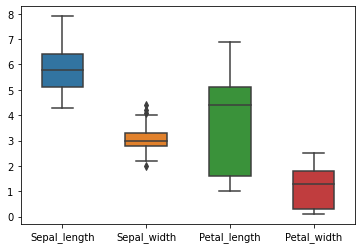

In [13]:
sns.boxplot(data = iris_data , width = 0.5 , fliersize=5)
sns.set(rc = {"figure.figsize" : (6,6)})

**Correlation between the features.**

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'], dtype='object')

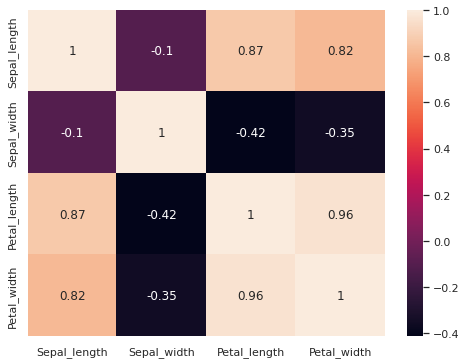

In [15]:
#Correlation using a  heatmap
corr = iris_data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr , annot = True)
iris_data.columns

**Violin Plot**

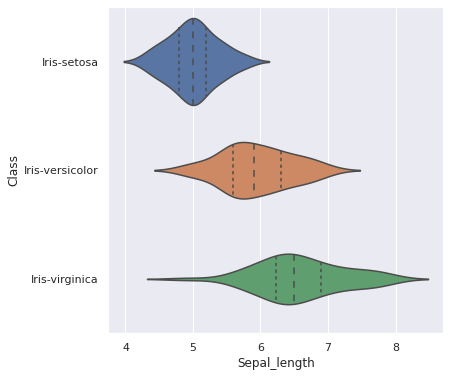

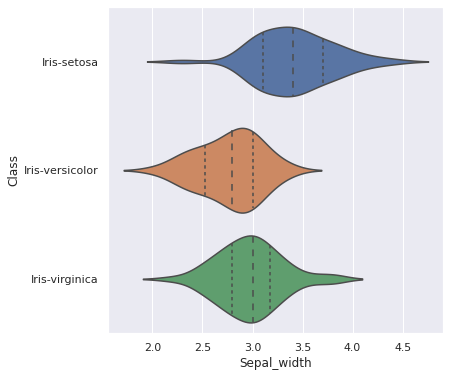

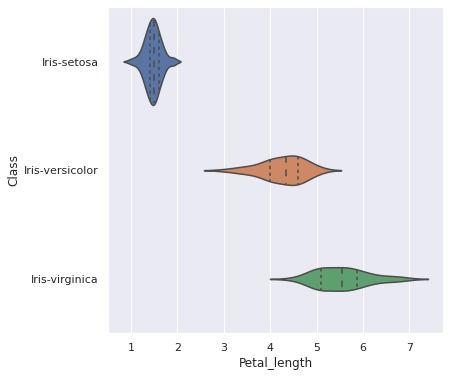

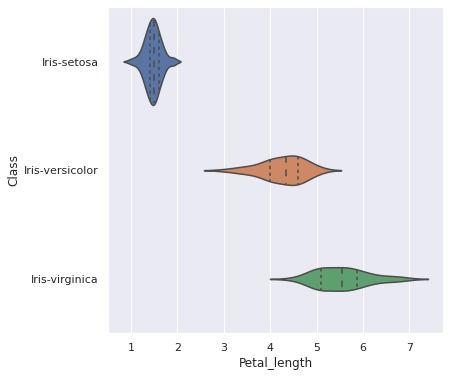

In [17]:
sns.violinplot(y ='Class' , x = 'Sepal_length' , data =iris_data ,inner = 'quartile')
plt.show()
sns.violinplot(y ='Class' , x = 'Sepal_width' , data =iris_data ,inner = 'quartile')
plt.show()
sns.violinplot(y ='Class' , x = 'Petal_length' , data =iris_data ,inner = 'quartile')
plt.show()
sns.violinplot(y ='Class' , x = 'Petal_length' , data =iris_data ,inner = 'quartile')
plt.show()

**Model**

In [19]:
X = iris_data.drop(['Class'] , axis = 1)
y = iris_data['Class']
print(f'X shape: {X.shape}| y shape:{y.shape}')

X shape: (149, 4)| y shape:(149,)


**Splitting the dataset.**

Splitting the dataset into 
1. Train dataset - 80%
2. Test dataset - 20% 

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.10 , random_state = 1)

**Model Creation.**

In [21]:
model = []
model.append(('SVC' , SVC(gamma = 'auto')))

**Model Building**

In [22]:
model = SVC(gamma = 'auto')
model.fit(X_train , y_train)
prediction = model.predict(X_test)

**Checking the accuracy of the model**

In [23]:
print(f'Test Accuracy: {accuracy_score(y_test,prediction)}')
print(f'Classification Report: \n{classification_report(y_test , prediction)}')

Test Accuracy: 0.9333333333333333
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.93        15
      macro avg       0.97      0.83      0.87        15
   weighted avg       0.94      0.93      0.92        15



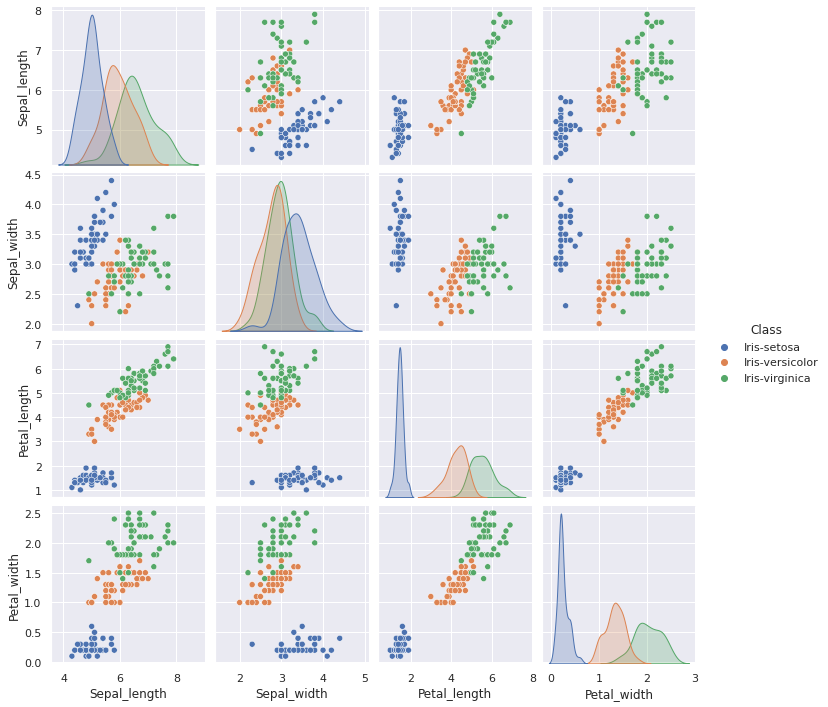

In [24]:
sns.pairplot(iris_data , hue= 'Class')

In [25]:

X_train = iris_data.drop("Class" , axis =1)
Y_train = iris_data['Class']

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix

x_train , x_test , y_train , y_test = train_test_split(X_train ,Y_train , test_size = 0.2)

**Logistic Regression.**

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train , y_train)

act = accuracy_score(y_train , lr.predict(x_train))
print('Training Accuracy is:' , (act *100))

act = accuracy_score(y_test , lr.predict(x_test))
print('Test Accuracy is:' , (act *100))



Training Accuracy is: 96.63865546218487
Test Accuracy is: 100.0


**Decision Tree Classifier.**

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(x_train , y_train)

act = accuracy_score(y_train , dt.predict(x_train))
print('Training Accuracy is:' , (act *100))

act = accuracy_score(y_test , dt.predict(x_test))
print('Test Accuracy is:' , (act *100))



Training Accuracy is: 100.0
Test Accuracy is: 96.66666666666667


**KNN Classification**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train , y_train)

act = accuracy_score(y_train , knn.predict(x_train))
print('Training Accuracy is:' , (act *100))

act = accuracy_score(y_test , knn.predict(x_test))
print('Test Accuracy is:' , (act *100))



Training Accuracy is: 97.47899159663865
Test Accuracy is: 96.66666666666667


**Support Vector Machine Classifier**

In [29]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(x_train , y_train)

act = accuracy_score(y_train , svm.predict(x_train))
print('Training Accuracy is:' , (act *100))

act = accuracy_score(y_test , svm.predict(x_test))
print('Test Accuracy is:' , (act *100))



Training Accuracy is: 96.63865546218487
Test Accuracy is: 100.0


**Random Forest Classifier**

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train , y_train)

act = accuracy_score(y_train , rf.predict(x_train))
print('Training Accuracy is:' , (act *100))

act = accuracy_score(y_test , rf.predict(x_test))
print('Test Accuracy is:' , (act *100))



Training Accuracy is: 100.0
Test Accuracy is: 100.0
